# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [4]:
import matplotlib.pyplot as plt

In [5]:
new_X = X.reshape((70000,28,28))

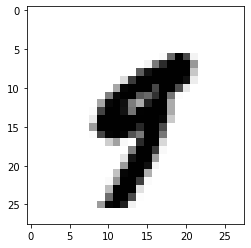

In [6]:
plt.imshow((new_X[36000]), cmap = plt.cm.binary, interpolation = 'nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [7]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [8]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [9]:
new_y_train = np.where(y_train !='5', 0, 5)
new_y_test = np.where(y_test!='5', 0, 5)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(X_train, new_y_train)

/home/christian/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
log_reg_pred = model.predict(X_test)
log_reg_pred

array([0, 0, 0, ..., 0, 5, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [13]:
print(f'The classifier predicts correctly with a {model.predict_proba(X_train)[36000][0]*100} % of probability')

The classifier predicts correctly with a 99.76813883569127 % of probability


### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [15]:
never_5_clf.fit(X_train, new_y_train)

In [16]:
N5clf_pred = never_5_clf.predict(X_test)
N5clf_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [18]:
print('='*70)
print('Comparing never 5 Classifier vs Logistic Regression')
print('='*70)
print(f'Accuracy score of never 5 Classifier is: {accuracy_score(y_true=new_y_test, y_pred=N5clf_pred)*100} %')
print(f'Accuracy score of Logistic Regression is: {accuracy_score(y_true=new_y_test, y_pred=log_reg_pred)*100} %')
print('='*70)
print(f'Confussion matrix score of never 5 Classifier is: {confusion_matrix(y_true=new_y_test, y_pred=N5clf_pred)}')
print(f'Confussion matrix score of Logistic Regression is: {confusion_matrix(y_true=new_y_test, y_pred=log_reg_pred)}')
print('='*70)
print(f'Precission score of never 5 Classifier is: {precision_score(y_true=new_y_test, y_pred=N5clf_pred, pos_label=5)*100} %')
print(f'Preccision score of Logistic Regression is: {precision_score(y_true=new_y_test, y_pred=log_reg_pred, pos_label=5)*100} %')
print('='*70)
print(f'Recall score of never 5 Classifier is: {recall_score(y_true=new_y_test, y_pred=N5clf_pred, pos_label=5)*100} %')
print(f'Recall score of Logistic Regression is: {recall_score(y_true=new_y_test, y_pred=log_reg_pred, pos_label=5)*100} %')
print('='*70)
print(f'F1 score of never 5 Classifier is: {f1_score(y_true=new_y_test, y_pred=N5clf_pred, pos_label=5)*100} %')
print(f'F1 score of Logistic Regression is: {f1_score(y_true=new_y_test, y_pred=log_reg_pred, pos_label=5)*100} %')
print('='*70)
print('The probability cutoff to decide the classes is 0.5 as default')

Comparing never 5 Classifier vs Logistic Regression
Accuracy score of never 5 Classifier is: 91.08000000000001 %
Accuracy score of Logistic Regression is: 97.78999999999999 %
Confussion matrix score of never 5 Classifier is: [[9108    0]
 [ 892    0]]
Confussion matrix score of Logistic Regression is: [[9034   74]
 [ 147  745]]
Precission score of never 5 Classifier is: 0.0 %
Preccision score of Logistic Regression is: 90.96459096459097 %
Recall score of never 5 Classifier is: 0.0 %
Recall score of Logistic Regression is: 83.5201793721973 %
F1 score of never 5 Classifier is: 0.0 %
F1 score of Logistic Regression is: 87.08357685563999 %
The probability cutoff to decide the classes is 0.5 as default


/home/christian/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [19]:
'''Taking a look, never 5 classifier does not add value as precission, recall and F1 score comparing with logistic regression'''

'Taking a look, never 5 classifier does not add value as precission, recall and F1 score comparing with logistic regression'

In [20]:
'''In first instance, model with high accuracy could be the best if the datasets are symmetric
where values of false positives and negatives are almost same. About precision, high precision
relates to the low false positive rate. Recall predicts positive observations to the all observations
and F1 score is the weighted average of precision and recall. F1 is usually more useful than
accuracy, especially if we have an uneven class distribution'''

'In first instance, model with high accuracy could be the best if the datasets are symmetric\nwhere values of false positives and negatives are almost same. About precision, high precision\nrelates to the low false positive rate. Recall predicts positive observations to the all observations\nand F1 score is the weighted average of precision and recall. F1 is usually more useful than\naccuracy, especially if we have an uneven class distribution'

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [21]:
from sklearn.metrics import roc_curve

In [22]:
print('='*70)
print('The roc_curve of never 5 Classifier & Logistic Regression')
print('='*70)
print(f'roc_curve of never 5 Classifier is: {roc_curve(new_y_test, N5clf_pred, 5)}')
print(f'roc_curve of Logistic Regression is: {roc_curve(new_y_test, log_reg_pred, 5)}')

The roc_curve of never 5 Classifier & Logistic Regression
roc_curve of never 5 Classifier is: (array([0., 1.]), array([0., 1.]), array([1, 0]))
roc_curve of Logistic Regression is: (array([0.        , 0.00812473, 1.        ]), array([0.        , 0.83520179, 1.        ]), array([6, 5, 0]))


/home/christian/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass pos_label=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


### Now find the roc_auc_score for each. 

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
print('='*70)
print('The roc_auc_score of never 5 Classifier & Logistic Regression')
print('='*70)
print(f'roc_auc_score of never 5 Classifier is: {roc_auc_score(new_y_test, N5clf_pred)*100} %')
print(f'roc_auc_score of Logistic Regression is: {roc_auc_score(new_y_test, log_reg_pred)*100} %')

The roc_auc_score of never 5 Classifier & Logistic Regression
roc_auc_score of never 5 Classifier is: 50.0 %
roc_auc_score of Logistic Regression is: 91.35385341029718 %


### What does this metric tell you? Which classifier works better with this metric in mind?

In [25]:
'''In a simple view, the metric confirms that the logistic regression represents a better classifier'''

'In a simple view, the metric confirms that the logistic regression represents a better classifier'